In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
#!pip install matplotlib
#!pip install seaborn

In [144]:
df = pd.read_csv("data/Yelp Restaurant Reviews.csv")

In [145]:
df

,Yelp URL,Rating,Date,Review Text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...
...,...,...,...,...
19891,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,7/17/2021,Had the chocolate cannoli! The filling was ric...
19892,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/21/2019,Love apricot croissant! I bought it at 4:00 PM...
19893,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/12/2019,Line was about 25 people long. It went fast! T...
19894,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,4/11/2021,Its hard not to order everything when I come h...


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19896 entries, 0 to 19895
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Yelp URL     19896 non-null  object
 1   Rating       19896 non-null  int64 
 2   Date         19896 non-null  object
 3   Review Text  19896 non-null  object
dtypes: int64(1), object(3)
memory usage: 621.9+ KB


In [147]:
df.describe()

,Rating
count,19896.000000
mean,4.130830
std,1.200746
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [148]:
## checking if missing values:
df.isnull().sum()

Yelp URL       0
Rating         0
Date           0
Review Text    0
dtype: int64

In [149]:
##No missing values found

In [150]:
df_1 = df
df_1['Date'] = pd.to_datetime(df_1['Date'])
df_1 = df_1.set_index('Date')

In [151]:
df_1['text']= df_1['Review Text']
df_1['text']

Date
2022-01-22    All I can say is they have very good ice cream...
2022-06-26    Nice little local place for ice cream.My favor...
2021-08-07    A delicious treat on a hot day! Staff was very...
2016-07-28    This was great service and a fun crew! I got t...
2015-06-23    This is one of my favorite places to get ice c...
                                    ...                        
2021-07-17    Had the chocolate cannoli! The filling was ric...
2019-10-21    Love apricot croissant! I bought it at 4:00 PM...
2019-10-12    Line was about 25 people long. It went fast! T...
2021-04-11    Its hard not to order everything when I come h...
2019-09-03    Every mall needs an Eataly for real. La Pastic...
Name: text, Length: 19896, dtype: object

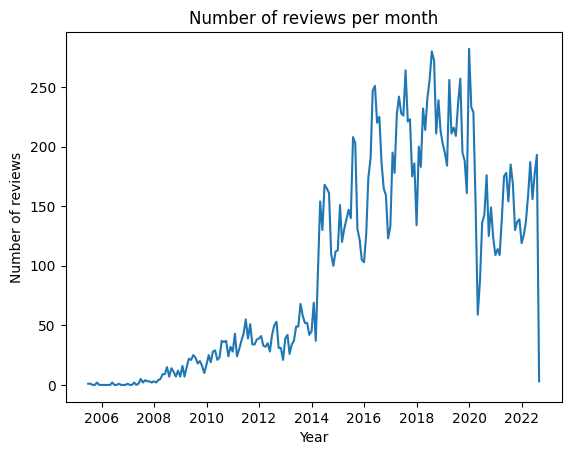

In [152]:
plt.plot(df_1['Review Text'].resample('M').count())
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.title('Number of reviews per month')
plt.show()

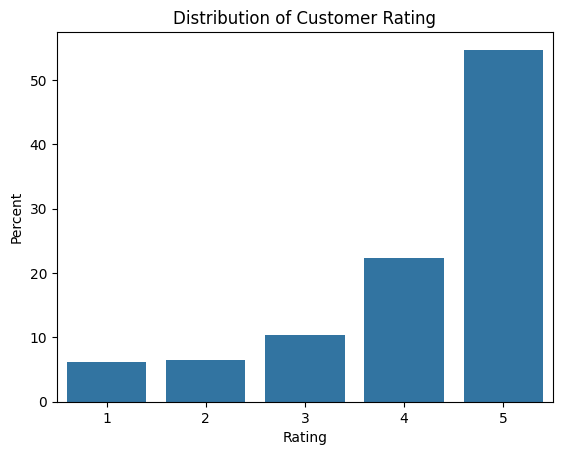

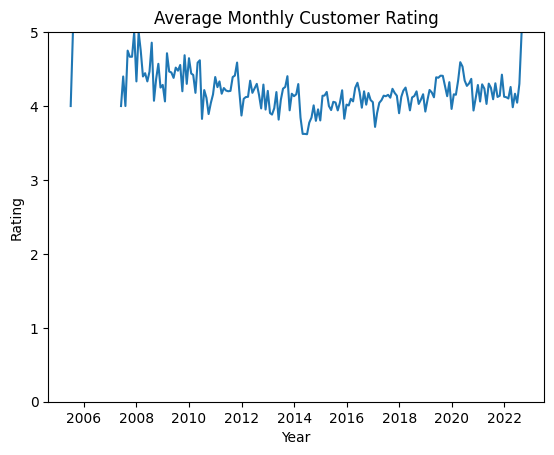

In [153]:
import seaborn as sns
ax = sns.barplot(data=df_1, x='Rating', y='Rating', estimator=lambda x: len(x) / len(df_1) * 100)
ax.set(ylabel="Percent")
plt.title('Distribution of Customer Rating')
plt.show()
plt.plot(df_1['Rating'].resample('M').mean())
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average Monthly Customer Rating')
plt.ylim(0,5)
plt.show()

# Checking the outlier in the data

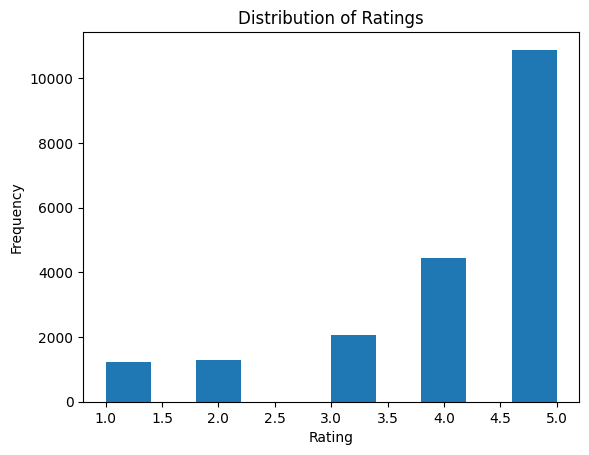

In [154]:
### Visualiting the distribution of ratingg data:

fig, ax = plt.subplots()

ax.hist(df["Rating"])  

ax.set_xlabel("Rating")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Ratings")
plt.show()

In [155]:
#!pip install nltk
#!pip install wordcloud

In [156]:
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import regexp_tokenize, wordpunct_tokenize, blankline_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [97]:
df_1['text'] = [i.replace("&amp;", '').replace("'",'') for i in df_1['text']]
#df_1['text']

Date
2022-01-22    All I can say is they have very good ice cream...
2022-06-26    Nice little local place for ice cream.My favor...
2021-08-07    A delicious treat on a hot day! Staff was very...
2016-07-28    This was great service and a fun crew! I got t...
2015-06-23    This is one of my favorite places to get ice c...
                                    ...                        
2021-07-17    Had the chocolate cannoli! The filling was ric...
2019-10-21    Love apricot croissant! I bought it at 4:00 PM...
2019-10-12    Line was about 25 people long. It went fast! T...
2021-04-11    Its hard not to order everything when I come h...
2019-09-03    Every mall needs an Eataly for real. La Pastic...
Name: text, Length: 19896, dtype: object

In [76]:
#df_1['Review Text']

In [77]:
def preprocessing(text):
    words = regexp_tokenize(text, pattern='w+|$[d.]+|S+')
    tokens = [w for w in words if w.lower() not in string.punctuation]
    stopw = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopw]
    tokens = [word for word in tokens if len(word)>=3]
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word) for word in tokens] 
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text


In [100]:
df_1['text1']=df_1['text'].apply(preprocessing)


In [102]:
df_1['text1']

,Yelp URL,Rating,Review Text,text,text1
Date,,,,,
2022-01-22,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,All I can say is they have very good ice cream...,All I can say is they have very good ice cream...,
2022-06-26,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,Nice little local place for ice cream.My favor...,Nice little local place for ice cream.My favor...,
2021-08-07,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,A delicious treat on a hot day! Staff was very...,A delicious treat on a hot day! Staff was very...,
2016-07-28,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,This was great service and a fun crew! I got t...,This was great service and a fun crew! I got t...,
2015-06-23,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,This is one of my favorite places to get ice c...,This is one of my favorite places to get ice c...,
...,...,...,...,...,...
2021-07-17,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,Had the chocolate cannoli! The filling was ric...,Had the chocolate cannoli! The filling was ric...,
2019-10-21,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,Love apricot croissant! I bought it at 4:00 PM...,Love apricot croissant! I bought it at 4:00 PM...,
2019-10-12,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,Line was about 25 people long. It went fast! T...,Line was about 25 people long. It went fast! T...,


In [103]:

df_1['text'] = df_1['text'].str.lower()
text_1 = df_1['text'].values

In [179]:
df_1['text']

Date
2022-01-22    All I can say is they have very good ice cream...
2022-06-26    Nice little local place for ice cream.My favor...
2021-08-07    A delicious treat on a hot day! Staff was very...
2016-07-28    This was great service and a fun crew! I got t...
2015-06-23    This is one of my favorite places to get ice c...
                                    ...                        
2021-07-17    Had the chocolate cannoli! The filling was ric...
2019-10-21    Love apricot croissant! I bought it at 4:00 PM...
2019-10-12    Line was about 25 people long. It went fast! T...
2021-04-11    Its hard not to order everything when I come h...
2019-09-03    Every mall needs an Eataly for real. La Pastic...
Name: text, Length: 19896, dtype: object

In [105]:
text_1

array(['all i can say is they have very good ice cream i would for sure recommend their cookies and creme ice cream it is very good',
       'nice little local place for ice cream.my favorite is their pumpkin shake ( fall season special).( my sweetness tolerance is low) their large size ice cream usually seems too sweet after having ice cream for a while. but love their pina colada. so refreshing. their banana split is good too.',
       'a delicious treat on a hot day! staff was very friendly and helpful-- gave us a sample and let us order a little earlier than open.',
       ...,
       'line was about 25 people long. it went fast! they have a variety of pastries and desserts to choose from. we got a tiramisu where the mascarpone tasted great. creamy and just the right amount of sweetness. got another dessert with chocolate ball over a cookie - toddler approved. the coffee was good. they serve lavazza coffee, fyi for coffee connoisseurs.',
       'its hard not to order everything whe

In [107]:
import nltk
from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [108]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [160]:
### Punctations removing:

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df["tokens"] = df.apply(lambda row: tokenizer.tokenize(row["Review Text"]), axis = 1)
#result = tokenizer.tokenize("Wow! I am excited to learn data science")

In [161]:
# ## tokenizing the review texts ;; word level tokesns
# tokens = word_tokenize(df["Review Text"][0])
# df["tokens"] = df.apply(lambda row: word_tokenize(row['tokens']), axis=1 )

In [162]:
#tokens

In [163]:
###length of tokens for each review text(each row)
df["tokens_length"] = df.apply(lambda row: len(row['tokens']), axis =1 )

In [164]:
### Removing stop words:
stop_words = set(stopwords.words('english'))
#df["filtered_tokens"] = df.apply(lambda row: [word for word in row['tokens'] if word.lower() not in stop_words] )
df['filtered_tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

In [165]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [175]:
## lemmatization of filtered tokens
lemmatizer=WordNetLemmatizer()
df["lemmatized_words"] = df["filtered_tokens"].apply(lambda filtered_tokens: [lemmatizer.lemmatize(i) for i in filtered_tokens] )

In [176]:
df

,Yelp URL,Rating,Date,Review Text,tokens,tokens_length,filtered_tokens,lemmatized_words
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2022-01-22,All I can say is they have very good ice cream...,"[All, I, can, say, is, they, have, very, good,...",26,"[say, good, ice, cream, would, sure, recommend...","[say, good, ice, cream, would, sure, recommend..."
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2022-06-26,Nice little local place for ice cream.My favor...,"[Nice, little, local, place, for, ice, cream, ...",50,"[Nice, little, local, place, ice, cream, favor...","[Nice, little, local, place, ice, cream, favor..."
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2021-08-07,A delicious treat on a hot day! Staff was very...,"[A, delicious, treat, on, a, hot, day, Staff, ...",26,"[delicious, treat, hot, day, Staff, friendly, ...","[delicious, treat, hot, day, Staff, friendly, ..."
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2016-07-28,This was great service and a fun crew! I got t...,"[This, was, great, service, and, a, fun, crew,...",73,"[great, service, fun, crew, got, banana, cream...","[great, service, fun, crew, got, banana, cream..."
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2015-06-23,This is one of my favorite places to get ice c...,"[This, is, one, of, my, favorite, places, to, ...",175,"[one, favorite, places, get, ice, cream, CU, a...","[one, favorite, place, get, ice, cream, CU, ar..."
...,...,...,...,...,...,...,...,...
19891,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,2021-07-17,Had the chocolate cannoli! The filling was ric...,"[Had, the, chocolate, cannoli, The, filling, w...",20,"[chocolate, cannoli, filling, rich, delicious,...","[chocolate, cannoli, filling, rich, delicious,..."
19892,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,2019-10-21,Love apricot croissant! I bought it at 4:00 PM...,"[Love, apricot, croissant, I, bought, it, at, ...",71,"[Love, apricot, croissant, bought, 4, 00, PM, ...","[Love, apricot, croissant, bought, 4, 00, PM, ..."
19893,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,2019-10-12,Line was about 25 people long. It went fast! T...,"[Line, was, about, 25, people, long, It, went,...",60,"[Line, 25, people, long, went, fast, variety, ...","[Line, 25, people, long, went, fast, variety, ..."
19894,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,2021-04-11,Its hard not to order everything when I come h...,"[Its, hard, not, to, order, everything, when, ...",31,"[hard, order, everything, come, good, also, or...","[hard, order, everything, come, good, also, or..."


In [177]:
df["lemmatized_words"]

0        [say, good, ice, cream, would, sure, recommend...
1        [Nice, little, local, place, ice, cream, favor...
2        [delicious, treat, hot, day, Staff, friendly, ...
3        [great, service, fun, crew, got, banana, cream...
4        [one, favorite, place, get, ice, cream, CU, ar...
                               ...                        
19891    [chocolate, cannoli, filling, rich, delicious,...
19892    [Love, apricot, croissant, bought, 4, 00, PM, ...
19893    [Line, 25, people, long, went, fast, variety, ...
19894    [hard, order, everything, come, good, also, or...
19895    [Every, mall, need, Eataly, real, La, Pasticce...
Name: lemmatized_words, Length: 19896, dtype: object

In [181]:
df['converted_text'] = df['lemmatized_words'].apply(lambda words: ' '.join(words))
df['converted_text']

0        say good ice cream would sure recommend cooky ...
1        Nice little local place ice cream favorite pum...
2        delicious treat hot day Staff friendly helpful...
3        great service fun crew got banana cream pie ch...
4        one favorite place get ice cream CU area bit d...
                               ...                        
19891    chocolate cannoli filling rich delicious canno...
19892    Love apricot croissant bought 4 00 PM Normally...
19893    Line 25 people long went fast variety pastry d...
19894    hard order everything come good also order Ins...
19895    Every mall need Eataly real La Pasticceria pas...
Name: converted_text, Length: 19896, dtype: object

In [169]:
df_1["text2"]= df["lemmatized_words"]

In [182]:
df['converted_text'] = df["converted_text"].str.lower()
df['converted_text']

0        say good ice cream would sure recommend cooky ...
1        nice little local place ice cream favorite pum...
2        delicious treat hot day staff friendly helpful...
3        great service fun crew got banana cream pie ch...
4        one favorite place get ice cream cu area bit d...
                               ...                        
19891    chocolate cannoli filling rich delicious canno...
19892    love apricot croissant bought 4 00 pm normally...
19893    line 25 people long went fast variety pastry d...
19894    hard order everything come good also order ins...
19895    every mall need eataly real la pasticceria pas...
Name: converted_text, Length: 19896, dtype: object

In [183]:
text_1 = df['converted_text'].values

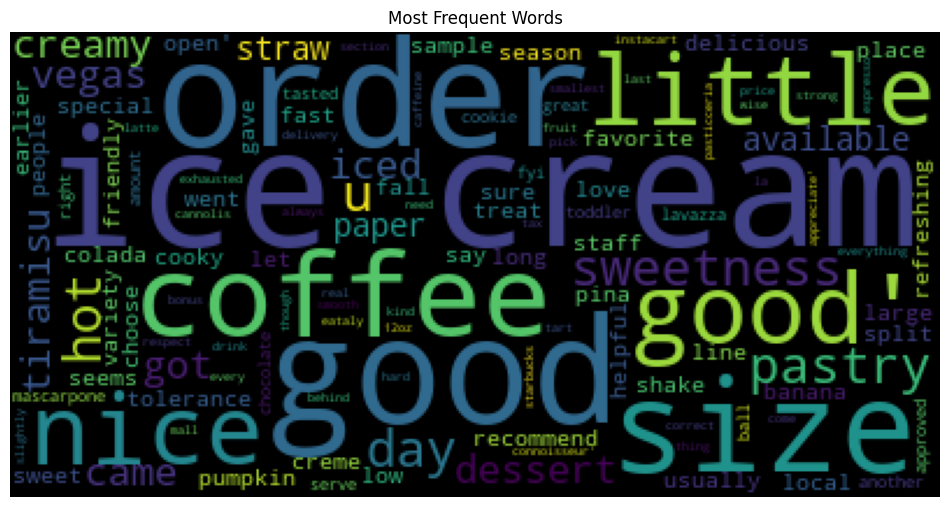

In [184]:
##After prepossessing, we can create a word cloud of the corpus to highlight the most frequent words. The more frequently a specific word appears in the text, the bigger and bolder it will be in the word cloud.

from wordcloud import WordCloud
wordcloud = WordCloud().generate(str(text_1))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(random_state=2017))
plt.title('Most Frequent Words')
plt.axis("off")
plt.show()

In [186]:
text_1

array(['say good ice cream would sure recommend cooky creme ice cream good',
       'nice little local place ice cream favorite pumpkin shake fall season special sweetness tolerance low large size ice cream usually seems sweet ice cream love pina colada refreshing banana split good',
       'delicious treat hot day staff friendly helpful gave u sample let u order little earlier open',
       ...,
       'line 25 people long went fast variety pastry dessert choose got tiramisu mascarpone tasted great creamy right amount sweetness got another dessert chocolate ball cookie toddler approved coffee good serve lavazza coffee fyi coffee connoisseur',
       'hard order everything come good also order instacart delivery always get order correct appreciate',
       'every mall need eataly real la pasticceria pastry section thing like tiramisu fruit tart cannolis came last day vegas caffeine pick exhausted espresso drink came hot iced 3 size price wise slightly starbucks iced latte smallest avai

# Pair of Words that Often Show up Together in a Review | Text Mining

In [185]:
word_list = []
for line in text_1:
    word_list.append(preprocessing(line))
word_list
from nltk.util import ngrams
from collections import Counter
def get_ngrams(txt, n):
    n_grams = ngrams(nltk.word_tokenize(txt),n)
    return [' '.join(grams) for grams in n_grams]
word_list_1 = str(word_list)
def remove_punctuations(word_list_1):
    words = nltk.word_tokenize(word_list_1)
    punt_removed = [w for w in words if w.lower() not in string.punctuation]
    return " ".join(punt_removed)
word_list_1=remove_punctuations(word_list_1)
bigrams = get_ngrams(word_list_1, 2)
bigrams_count = Counter(bigrams)
bigram_freq = pd.DataFrame.from_dict(bigrams_count, orient='index')
bigram_freq = bigram_freq.rename(columns={'index':'words', 0:'frequency'})
bigram_freq = bigram_freq.sort_values(by='frequency', ascending=False).head(20)
print(bigram_freq)

            frequency
`` ``           19811
`` 'www            32
'www ``            22
'www www           10
www www            10
www ``             10
`` 'wwww            5
'wwww ``            5
`` 'wwwww           3
'wwwww ``           3
`` 'wwwwww          2
'wwwwww ``          2


In [189]:
#!pip install gensim

In [196]:
from nltk.corpus import stopwords
my_stop_words = set(stopwords.words('english') + ['super', 'duper', 'place'])
from nltk.tokenize import sent_tokenize
reviews = ' '.join(df_1.text)
sentences = sent_tokenize(reviews)
good_token_clean = list()
import re
for sentence in sentences:
    eng_word = re.findall(r'[A-Za-z-]+', sentence)
    good_token_clean.append([i.lower() for i in eng_word if i.lower() not in my_stop_words])
from gensim.models import Word2Vec
model_ted = Word2Vec(sentences=good_token_clean, window=10, min_count=1, workers=4, sg=0)


In [197]:
model_ted.predict_output_word(['taste'], topn=10)

[('buds', 0.918434),
 ('artificial', 0.008098692),
 ('texture', 0.002382124),
 ('exactly', 0.0021728831),
 ('like', 0.001561002),
 ('weird', 0.0015129129),
 ('lacked', 0.0014233647),
 ('difference', 0.0011013531),
 ('sour', 0.0007497746),
 ('could', 0.0007236012)]

In [198]:
model_ted.predict_output_word(['service'], topn=10)

[('customer', 0.99932116),
 ('friendly', 0.000343101),
 ('slow', 0.00022866094),
 ('poor', 3.2699747e-05),
 ('quick', 2.1913975e-05),
 ('excellent', 9.869868e-06),
 ('efficient', 6.6360935e-06),
 ('fast', 6.5599006e-06),
 ('unfriendly', 2.9035662e-06),
 ('courteous', 2.5033717e-06)]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...


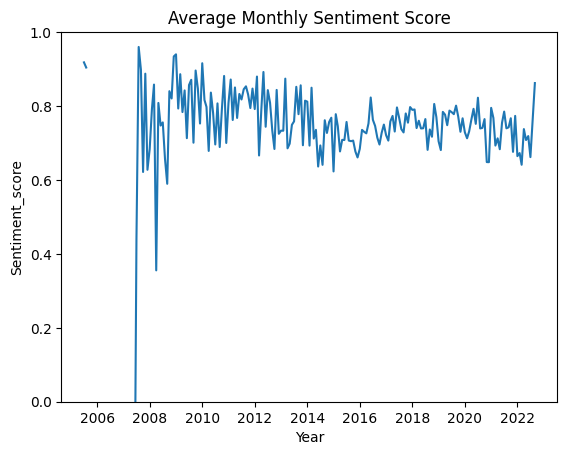

In [199]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores = df_1['text'].apply(sid.polarity_scores)
sentiment = sentiment_scores.apply(lambda x: x['compound'])
monthly_sentiment = sentiment.resample('M').mean()
plt.plot(monthly_sentiment)
plt.xlabel('Year')
plt.ylabel('Sentiment_score')
plt.title('Average Monthly Sentiment Score')
plt.ylim(0,1)
plt.show()

In [205]:
from sklearn.feature_extraction.text import CountVectorizer
lemm = WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))
tf_vectorizer = LemmaCountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(word_list)
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)
lda.fit(tf)
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)
n_top_words = 40
print("nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words)


nTopics in LDA model: 
nTopic #0:www wwww wwwww wwwwww
nTopic #1:wwwwww www wwww wwwww
nTopic #2:wwwww www wwww wwwwww
nTopic #3:wwww www wwwww wwwwww
nTopic #4:www wwww wwwww wwwwww


In [203]:
!pip install scikit-learn

   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB 1.3 MB/s eta 0:00:08
   ---------------------------------------- 0.1/9.2 MB 1.0 MB/s eta 0:00:09
   ---------------------------------------- 0.1/9.2 MB 1.1 MB/s eta 0:00:09
    --------------------------------------- 0.1/9.2 MB 774.0 kB/s eta 0:00:12
    --------------------------------------- 0.2/9.2 MB 953.7 kB/s eta 0:00:10
   - -------------------------------------- 0.3/9.2 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.4/9.2 MB 1.2 MB/s eta 0:00:08
   -- ------------------------------------- 0.5/9.2 MB 1.3 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/9.2 MB 1.4 MB/s eta 0:00:07
   -- ------------------------------------- 0.7/9.2 MB 1.4 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/9.2 MB 1.5 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/9.2 MB 1.5 MB/s eta 0:00:06
   ---- -------

In [32]:
#for rating column:
z_scores = (df['Rating']- df['Rating'].mean())/df['Rating'].std()
z_scores

0        0.723858
1       -0.108957
2        0.723858
3       -0.108957
4        0.723858
           ...   
19891   -0.108957
19892   -0.108957
19893   -0.108957
19894    0.723858
19895   -0.108957
Name: Rating, Length: 19896, dtype: float64

In [33]:
z_scores.describe()

count    1.989600e+04
mean     3.714136e-16
std      1.000000e+00
min     -2.607404e+00
25%     -1.089575e-01
50%      7.238578e-01
75%      7.238578e-01
max      7.238578e-01
Name: Rating, dtype: float64

In [34]:
### removing the row with z_scores greater than threshold (2) 
threshold = 2
df_cleaned = df[(np.abs(z_scores) <= threshold)]

In [35]:
df_cleaned

,Yelp URL,Rating,Date,Review Text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2022-01-22,All I can say is they have very good ice cream...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2022-06-26,Nice little local place for ice cream.My favor...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2021-08-07,A delicious treat on a hot day! Staff was very...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2016-07-28,This was great service and a fun crew! I got t...
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2015-06-23,This is one of my favorite places to get ice c...
...,...,...,...,...
19891,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,2021-07-17,Had the chocolate cannoli! The filling was ric...
19892,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,2019-10-21,Love apricot croissant! I bought it at 4:00 PM...
19893,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,2019-10-12,Line was about 25 people long. It went fast! T...
19894,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,2021-04-11,Its hard not to order everything when I come h...


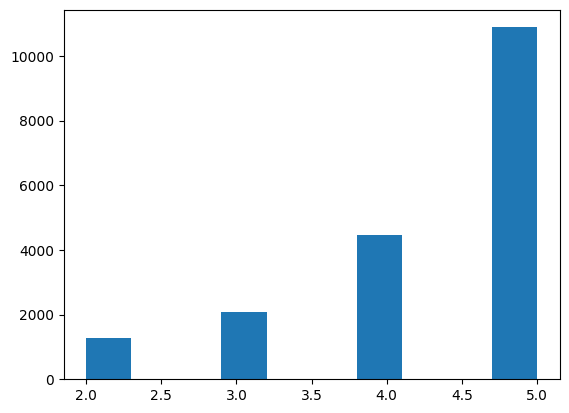

In [37]:
### Visualiting the distribution of ratingg data:
fx, ax = plt.subplots()
ax.hist(df_cleaned["Rating"])
plt.show()

### Here, the minority class data is detected:
1) Removed using z_score threshold (df_cleaned)
2) Can be kept to represent the minority class (df)

# For text preprocesssing:

In [ ]:
import nltk
from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

In [ ]:
### Punctations removing:

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df["tokens"] = df.apply(lambda row: tokenizer.tokenize(row["Review Text"]), axis = 1)
#result = tokenizer.tokenize("Wow! I am excited to learn data science")

In [ ]:
df

In [ ]:
# ## tokenizing the review texts ;; word level tokesns
# tokens = word_tokenize(df["Review Text"][0])
# df["tokens"] = df.apply(lambda row: word_tokenize(row['tokens']), axis=1 )

In [ ]:
#tokens

In [ ]:
###length of tokens for each review text(each row)
df["tokens_length"] = df.apply(lambda row: len(row['tokens']), axis =1 )

In [ ]:
df

In [ ]:
### Removing stop words:
stop_words = set(stopwords.words('english'))
#df["filtered_tokens"] = df.apply(lambda row: [word for word in row['tokens'] if word.lower() not in stop_words] )
df['filtered_tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

In [ ]:
df

In [ ]:
nltk.download('wordnet')

In [ ]:
## lemmatization of filtered tokens
lemmatizer=WordNetLemmatizer()
df["lemmatized_words"] = df["filtered_tokens"].apply(lambda filtered_tokens: [lemmatizer.lemmatize(i) for i in filtered_tokens] )

In [ ]:
df

# Exploratory Data Analysis

In [207]:
#mean, median, and standard deviation for numerical columns
df.describe()

,Rating,Date,tokens_length,lemmatized_words1
count,19896.000000,19896,19896.000000,0.0
mean,4.130830,2017-08-27 13:56:05.500603136,93.742360,NaN
min,1.000000,2005-06-24 00:00:00,1.000000,NaN
25%,4.000000,2015-10-11 12:00:00,39.000000,NaN
50%,5.000000,2017-12-31 00:00:00,69.000000,NaN
75%,5.000000,2019-11-17 00:00:00,121.000000,NaN
max,5.000000,2022-08-02 00:00:00,977.000000,NaN
std,1.200746,NaN,82.412826,NaN


### ##Visualizing the improvement in the word tokenizing in normal tokens vs lemmatized tokens:

In [208]:
import seaborn as sns
from collections import Counter

def most_common_visualize(column_name):
     #Combining the  lists into a single list
    all_tokens = [token for tokens_list in df[column_name] for token in tokens_list]
    
    word_counts = Counter(all_tokens)

    ##top n20 most frequent words
    top_n = 20  
    most_common_words = word_counts.most_common(top_n)
    common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

    # bar plotfor visualizing the most common words
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')
    plt.title(f'Top {top_n} Most Common Words in the {column_name} column')
    plt.xlabel('Word Count')
    plt.ylabel('Word')
    plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_21144\522927039.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')


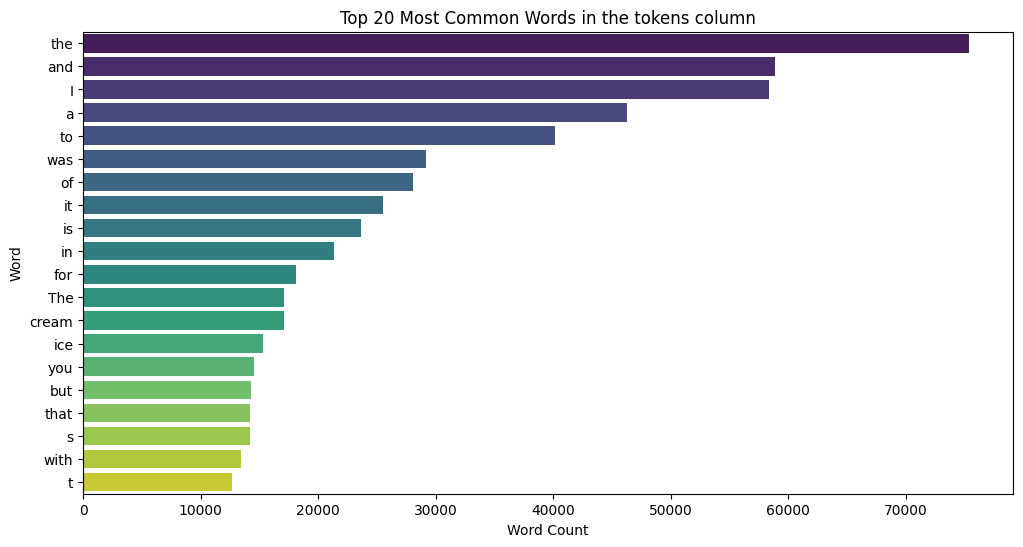

C:\Users\Dell\AppData\Local\Temp\ipykernel_21144\522927039.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')


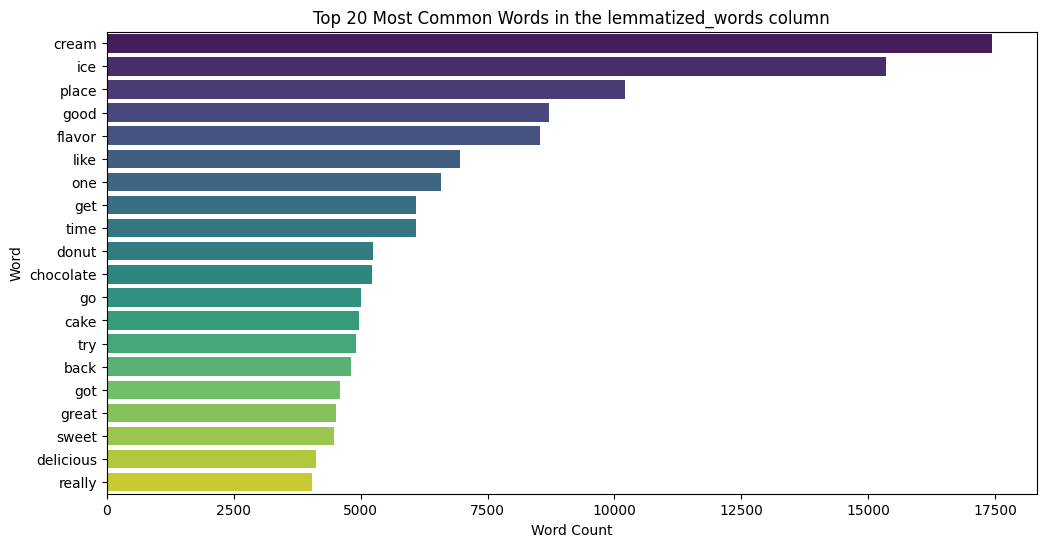

In [209]:
most_common_visualize("tokens")
most_common_visualize("lemmatized_words")

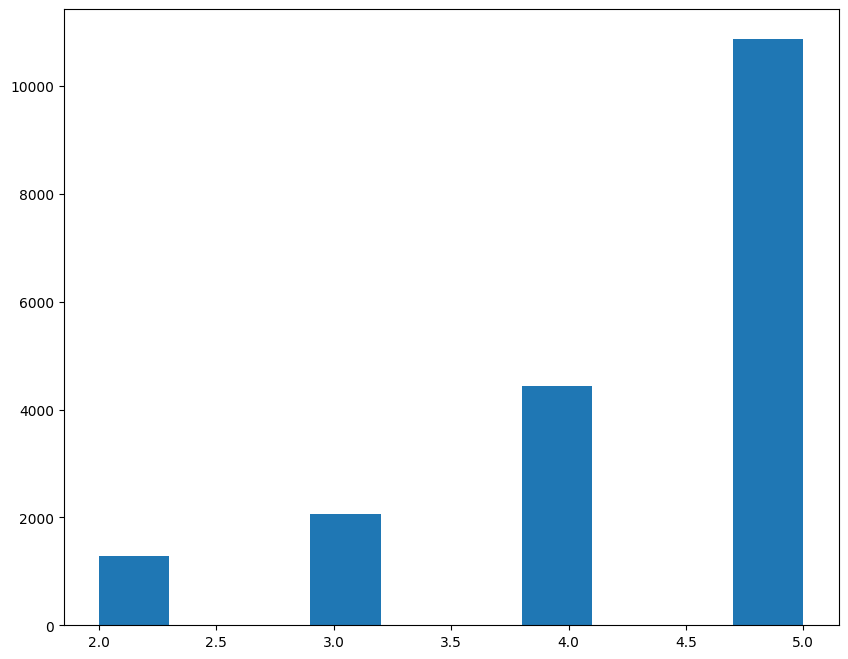

In [210]:
### Visualiting the distribution of ratingg data:
fx, ax = plt.subplots(figsize=(10,8))
ax.hist(df_cleaned["Rating"])
plt.show()

## 

## Model Building and Training:

In [211]:
df

,Yelp URL,Rating,Date,Review Text,tokens,tokens_length,filtered_tokens,lemmatized_words,lemmatized_words1,converted_text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2022-01-22,All I can say is they have very good ice cream...,"[All, I, can, say, is, they, have, very, good,...",26,"[say, good, ice, cream, would, sure, recommend...","[say, good, ice, cream, would, sure, recommend...",NaN,say good ice cream would sure recommend cooky ...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2022-06-26,Nice little local place for ice cream.My favor...,"[Nice, little, local, place, for, ice, cream, ...",50,"[Nice, little, local, place, ice, cream, favor...","[Nice, little, local, place, ice, cream, favor...",NaN,nice little local place ice cream favorite pum...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2021-08-07,A delicious treat on a hot day! Staff was very...,"[A, delicious, treat, on, a, hot, day, Staff, ...",26,"[delicious, treat, hot, day, Staff, friendly, ...","[delicious, treat, hot, day, Staff, friendly, ...",NaN,delicious treat hot day staff friendly helpful...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2016-07-28,This was great service and a fun crew! I got t...,"[This, was, great, service, and, a, fun, crew,...",73,"[great, service, fun, crew, got, banana, cream...","[great, service, fun, crew, got, banana, cream...",NaN,great service fun crew got banana cream pie ch...
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2015-06-23,This is one of my favorite places to get ice c...,"[This, is, one, of, my, favorite, places, to, ...",175,"[one, favorite, places, get, ice, cream, CU, a...","[one, favorite, place, get, ice, cream, CU, ar...",NaN,one favorite place get ice cream cu area bit d...
...,...,...,...,...,...,...,...,...,...,...
19891,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,2021-07-17,Had the chocolate cannoli! The filling was ric...,"[Had, the, chocolate, cannoli, The, filling, w...",20,"[chocolate, cannoli, filling, rich, delicious,...","[chocolate, cannoli, filling, rich, delicious,...",NaN,chocolate cannoli filling rich delicious canno...
19892,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,2019-10-21,Love apricot croissant! I bought it at 4:00 PM...,"[Love, apricot, croissant, I, bought, it, at, ...",71,"[Love, apricot, croissant, bought, 4, 00, PM, ...","[Love, apricot, croissant, bought, 4, 00, PM, ...",NaN,love apricot croissant bought 4 00 pm normally...
19893,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,2019-10-12,Line was about 25 people long. It went fast! T...,"[Line, was, about, 25, people, long, It, went,...",60,"[Line, 25, people, long, went, fast, variety, ...","[Line, 25, people, long, went, fast, variety, ...",NaN,line 25 people long went fast variety pastry d...
19894,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,2021-04-11,Its hard not to order everything when I come h...,"[Its, hard, not, to, order, everything, when, ...",31,"[hard, order, everything, come, good, also, or...","[hard, order, everything, come, good, also, or...",NaN,hard order everything come good also order ins...


In [212]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [213]:
#X_train = vectorizer.fit_transform(df[''])

In [214]:
X_train

NameError: name 'X_train' is not defined

In [215]:
#to categorize ratings
def categorize_rating(rating):
    if rating > 3:
        return "Positive"
    elif rating < 3:
        return "Negative"
    else:
        return "Neutral"
    
df['Sentiment'] = df['Rating'].apply(categorize_rating)
print(df[['Rating', 'Sentiment']])

       Rating Sentiment
0           5  Positive
1           4  Positive
2           5  Positive
3           4  Positive
4           5  Positive
...       ...       ...
19891       4  Positive
19892       4  Positive
19893       4  Positive
19894       5  Positive
19895       4  Positive

[19896 rows x 2 columns]


In [216]:
df["Sentiment"].value_counts()

Sentiment
Positive    15330
Negative     2497
Neutral      2069
Name: count, dtype: int64

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

df['Lemmatized_Text'] = df['lemmatized_words'].apply(' '.join)

#   mapping from string labels to integer labels
sentiment_mapping = {"Negative": 0, "Neutral": 1, "Positive": 2}

# Map the string labels to integer labels in the DataFrame
df['Sentiment'] = df['Sentiment'].map(sentiment_mapping)


#Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Lemmatized_Text'], df['Sentiment'], test_size=0.2, random_state=42)

#Create a CountVectorizer to convert lemmatized words to numerical features
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [218]:
print(X_train)


  (0, 6037)	1
  (0, 15830)	1
  (0, 4529)	4
  (0, 11893)	1
  (0, 14476)	1
  (0, 2964)	1
  (0, 4679)	2
  (0, 3383)	2
  (0, 2137)	1
  (0, 18400)	1
  (0, 13212)	1
  (0, 7619)	1
  (0, 2772)	1
  (0, 17436)	1
  (0, 7453)	2
  (0, 7114)	1
  (0, 13345)	1
  (0, 11395)	1
  (0, 18062)	1
  (0, 5959)	1
  (0, 16444)	1
  (0, 6048)	1
  (0, 9824)	1
  (0, 15116)	1
  (0, 16965)	1
  :	:
  (15915, 6175)	2
  (15915, 17786)	1
  (15915, 7522)	1
  (15915, 12485)	1
  (15915, 3452)	1
  (15915, 8029)	2
  (15915, 15941)	1
  (15915, 17175)	1
  (15915, 5222)	1
  (15915, 6034)	1
  (15915, 18327)	1
  (15915, 5006)	1
  (15915, 13674)	1
  (15915, 1360)	1
  (15915, 12228)	1
  (15915, 10323)	1
  (15915, 10633)	1
  (15915, 16172)	2
  (15915, 16241)	1
  (15915, 16560)	1
  (15915, 13324)	1
  (15915, 9004)	1
  (15915, 14555)	1
  (15915, 13312)	1
  (15915, 7711)	1


In [219]:
###Training Naive Bayes classifier

from sklearn.naive_bayes import MultinomialNB
#Training Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# predictions on the test data
y_pred = classifier.predict(X_test)

# model evaluation:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.8437185929648241
              precision    recall  f1-score   support

           0       0.71      0.62      0.66       516
           1       0.38      0.27      0.32       401
           2       0.90      0.96      0.93      3063

    accuracy                           0.84      3980
   macro avg       0.66      0.62      0.64      3980
weighted avg       0.82      0.84      0.83      3980



[[ 320   92  104]
 [  80  108  213]
 [  52   81 2930]]


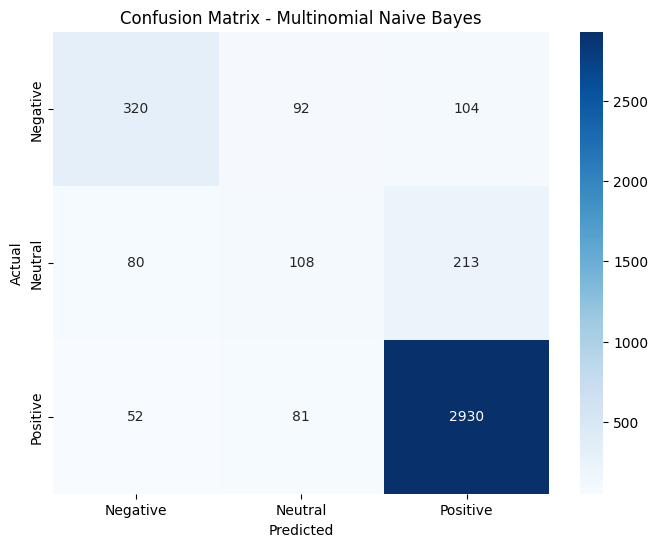

In [220]:
# Create the confusion matrix
confusion_matrix_nb = confusion_matrix(y_test, y_pred)
print(confusion_matrix_nb)
# Plot the confusion matrix with numbers
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.show()


In [ ]:
# Create a Saaupport Vector Machine (SVM) classifier]
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)
confusion_matrix_nb = confusion_matrix(y_test, y_pred)
print(confusion_matrix_nb)

In [ ]:
### XGBoost Classifier
from xgboost import XGBClassifier

# Create an XGBoost classifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

#Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)



In [ ]:
# Create the confusion matrix
confusion_matrix_nb = confusion_matrix(y_test, y_pred)
print(confusion_matrix_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.show()

In [ ]:
print(confusion_matrix_nb)

In [ ]:
!pip install seaborn --upgrade

In [ ]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

In [ ]:
## Printing the evaluation metrics

plt.plot(confusion_matrix_nb)

sns.heatmap(confusion_matrix_nb, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [221]:
###Topic modeling using LDA:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['Lemmatized_Text'])

# Applying LDA
num_topics = 5 # for now 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

#   top words for each topic
feature_names = vectorizer.get_feature_names_out()
n_top_words = 10

topic_top_words = []
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    topic_top_words.append(top_words)
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

# topics to the reviews
topic_assignments = lda.transform(dtm)
df['Topic'] = topic_assignments.argmax(axis=1)


result_df = pd.DataFrame({'Lemmatized_Text': df['Lemmatized_Text'], 'Review Text': df['Review Text'], 'Topic': df['Topic'], 'Sentiment Class': df['Sentiment']})
#print(result_df)


Topic #1: donut, time, line, order, place, good, like, service, people, customer
Topic #2: bakery, good, pastry, chocolate, croissant, coffee, like, macarons, sandwich, macaroon
Topic #3: cake, cupcake, milk, like, good, soft, chocolate, try, cereal, serve
Topic #4: cream, ice, flavor, place, good, chocolate, like, scoop, try, best
Topic #5: place, great, love, delicious, good, friendly, amazing, definitely, staff, coffee


In [222]:
result_df

,Lemmatized_Text,Review Text,Topic,Sentiment Class
0,say good ice cream would sure recommend cooky ...,All I can say is they have very good ice cream...,3,2
1,Nice little local place ice cream favorite pum...,Nice little local place for ice cream.My favor...,3,2
2,delicious treat hot day Staff friendly helpful...,A delicious treat on a hot day! Staff was very...,4,2
3,great service fun crew got banana cream pie ch...,This was great service and a fun crew! I got t...,3,2
4,one favorite place get ice cream CU area bit d...,This is one of my favorite places to get ice c...,3,2
...,...,...,...,...
19891,chocolate cannoli filling rich delicious canno...,Had the chocolate cannoli! The filling was ric...,1,2
19892,Love apricot croissant bought 4 00 PM Normally...,Love apricot croissant! I bought it at 4:00 PM...,1,2
19893,Line 25 people long went fast variety pastry d...,Line was about 25 people long. It went fast! T...,1,2
19894,hard order everything come good also order Ins...,Its hard not to order everything when I come h...,0,2


## Visualizing each topics separately

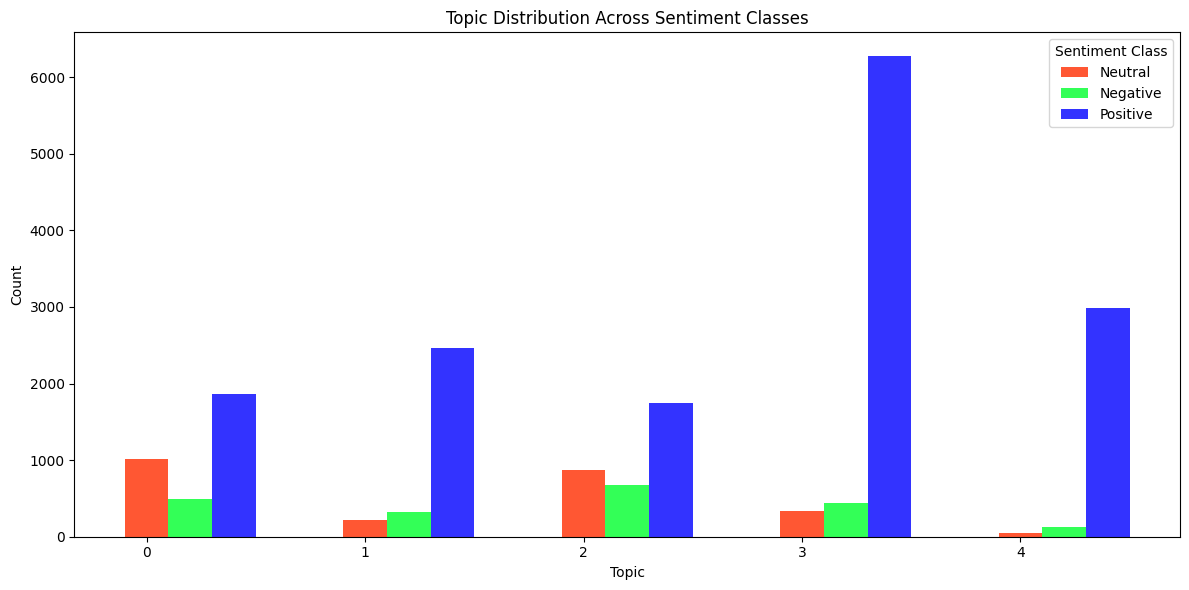

In [223]:

result_df['Topic'] = result_df['Topic'].astype(str)
result_df['Sentiment Class'] = result_df['Sentiment Class'].astype(str)

topic_sentiment_counts = result_df.groupby(['Topic', 'Sentiment Class']).size().unstack(fill_value=0)

#  grouped bar plot
plt.figure(figsize=(12, 6))
bar_width = 0.2

bar_positions = range(len(topic_sentiment_counts))

#bars for each sentiment class
for sentiment, color in zip(topic_sentiment_counts.columns, ['#FF5733', '#33FF57', '#3333FF']):
    plt.bar(
        [pos + bar_width for pos in bar_positions],
        topic_sentiment_counts[sentiment],
        bar_width,
        label=sentiment,
        color=color
    )
    bar_positions = [pos+ bar_width for pos in bar_positions]

# Set the x-axis labels
topics = topic_sentiment_counts.index
x_positions = [pos + bar_width for pos in range(len(topic_sentiment_counts))]
plt.xticks(x_positions, topics)

# :abels and title
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Topic Distribution Across Sentiment Classes')
plt.legend(title='Sentiment Class', labels=['Neutral', 'Negative', 'Positive'])


# Showing lplots:
plt.tight_layout()
plt.show()

In [224]:
first_topic = lda.components_[0]
first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-1000 - 1 :-1]]
firstcloud = WordCloud(
                          background_color='black',
                          width=3000,
                          height=2000
                         ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

IndexError: index 3306 is out of bounds for axis 0 with size 4

### Insights
<h4>Sentiment Analysis Insights:</h4>

Average accuracy of 85%. <br>
Positive reviews are most common.<br>
Strong performance in identifying positive sentiments.<br>
Service issues are often mentioned in negative reviews.<br>

<h4>Topic Modeling Insights: from above graphs</h4>

Topic #0: donut, time, line, order, place, good, like, service, people, customer <br>
Topic #1: bakery, good, pastry, chocolate, croissant, coffee, like, macarons, sandwich, macaroon <br>
Topic #2: cake, cupcake, milk, like, good, soft, chocolate, try, cereal, serve <br>
Topic #3: cream, ice, flavor, place, good, chocolate, like, scoop, try, best <br>
Topic #4: place, great, love, delicious, good, friendly, amazing, definitely, staff, coffee<br>
<br>
"Food Quality" is significant for positive reviews <br>
"Service" is a common issue in negative reviews. <br>
Emphasize "Value for Money" for marketing. <br>

Recommendations to restaurants from above insights:

Improve customer service. <br>
Highlight food quality in marketing. <br>
Use affordability as a marketing strategy. <br>